In [2]:
import matplotlib.pyplot as plt
import numpy as np
from nilearn import plotting
import matplotlib.pyplot as plt
from nilearn import datasets
import nibabel as nib

def viz_correlation_matrix(correlation_matrix, labels):
    np.fill_diagonal(correlation_matrix, 0)

    plotting.plot_matrix(
        correlation_matrix,
        figure=(5, 4),
        labels=labels, # background 제거한 labels여야 함
        vmax=0.8,
        vmin=-0.8,
        title="Functional Connectivity Matrix",
        reorder=True,
    )

    plt.show()
# FC 이상 : sub-50029, sub-10271, sub-10998, sub-50006, sub-70020, sub-50008
# 애매하게 FC 이상 : sub-60078

In [3]:
corr_e = np.load(f'../data/UCLA_CNP/FC100_sub-50029.npy')
corr= np.load(f'../data/UCLA_CNP/FC100_sub-10159.npy')

In [4]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=7, resolution_mm=1, data_dir='data/atlas')
atlas.labels = np.insert(atlas.labels, 0, "Background")
atlasimg = nib.load(atlas.maps)
reginorigparc = np.unique(atlasimg.get_fdata())[1:].astype(int)
new_labels = atlas.labels[reginorigparc]

C:\Users\janet\AppData\Local\Temp\ipykernel_38076\2423631777.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


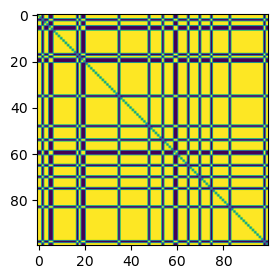

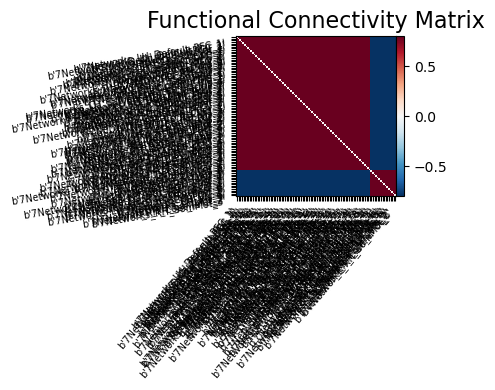

In [5]:
fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(corr_e)
fig.show()

viz_correlation_matrix(corr_e, new_labels)

C:\Users\janet\AppData\Local\Temp\ipykernel_38076\2116637316.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


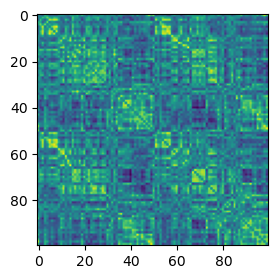

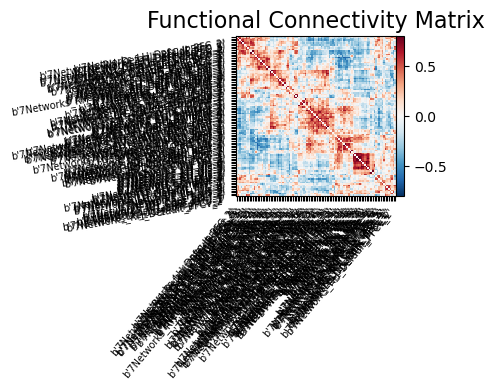

In [6]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(corr)
fig.show()

viz_correlation_matrix(corr, new_labels)